# Processing surfaces and points in napari - from python
[napari-process-points-and-surfaces](https://github.com/haesleinhuepf/napari-process-points-and-surfaces) (nppas) allows post-processing of surface and point cloud data. The available functionality uses [vedo](http://vedo.embl.es/) in the background.

In [1]:
import napari_process_points_and_surfaces as nppas

import napari
import numpy as np
from skimage.measure import label

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

In [3]:
from skimage.data import cells3d
nuclei = cells3d()[:,1,60:120,30:80]
nuclei.shape

(60, 60, 50)

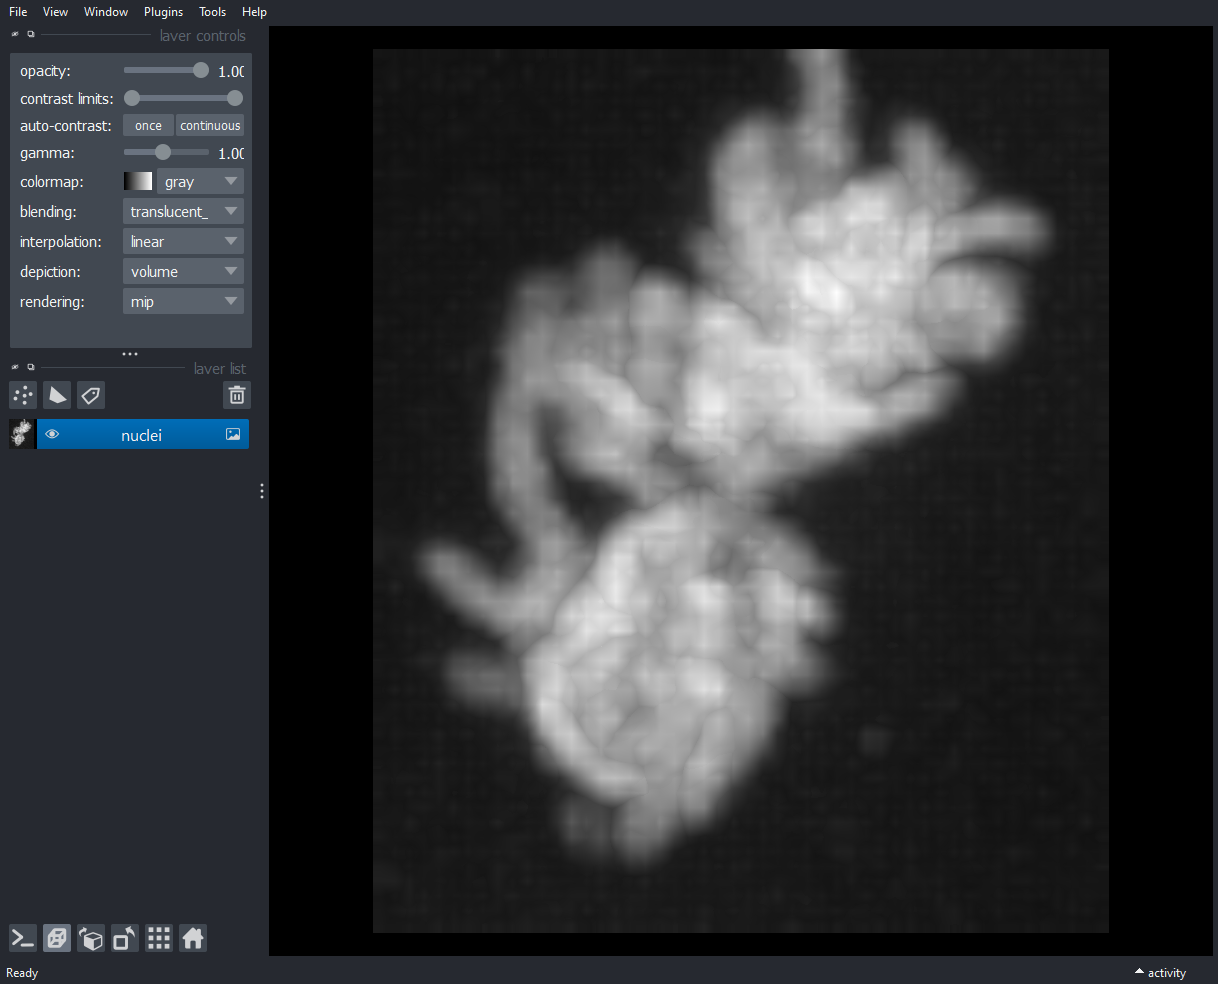

In [4]:
viewer.add_image(nuclei)

napari.utils.nbscreenshot(viewer)

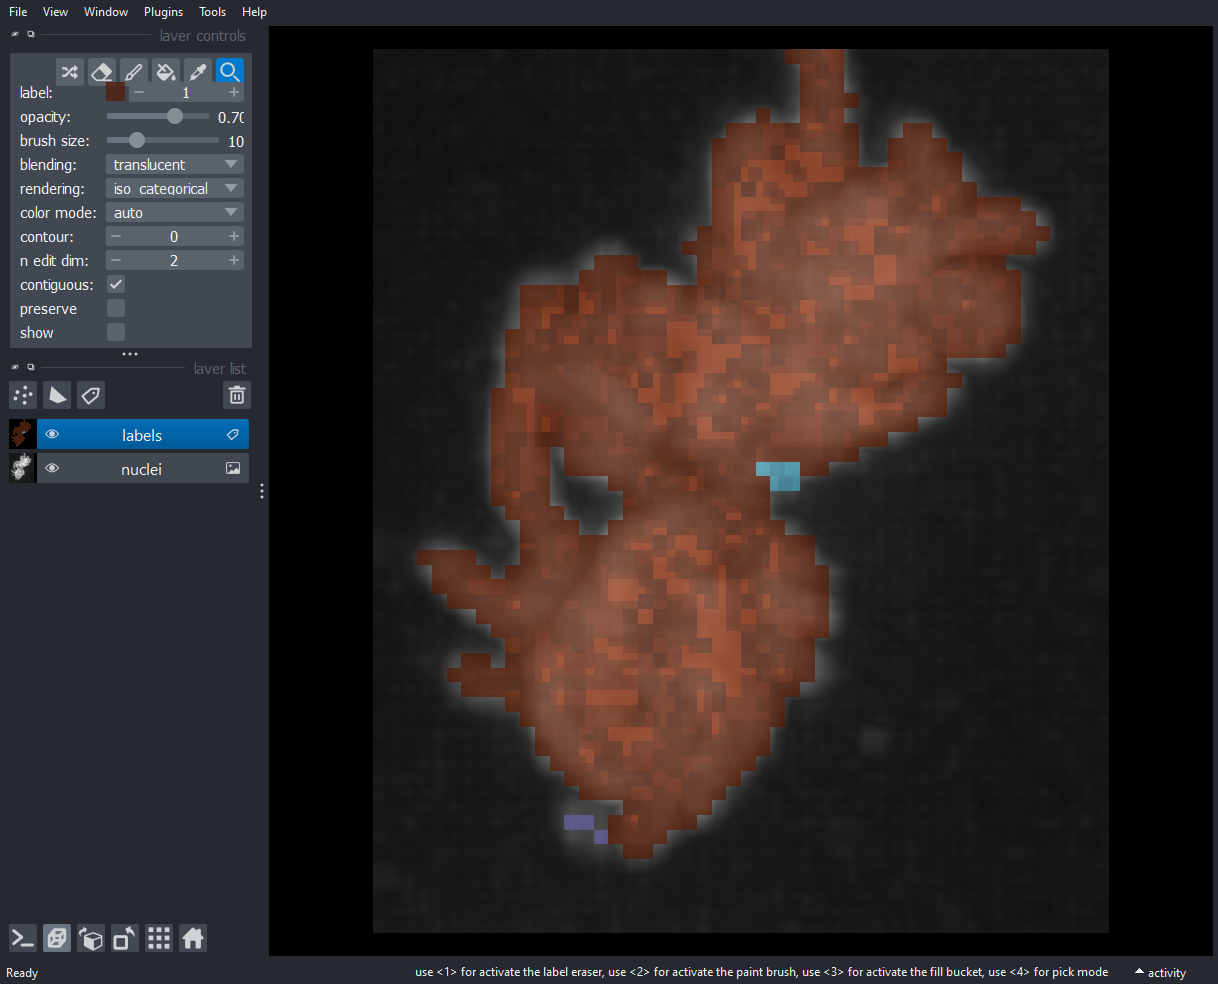

In [5]:
labels = label(nuclei>20000)

viewer.add_labels(labels)

napari.utils.nbscreenshot(viewer)

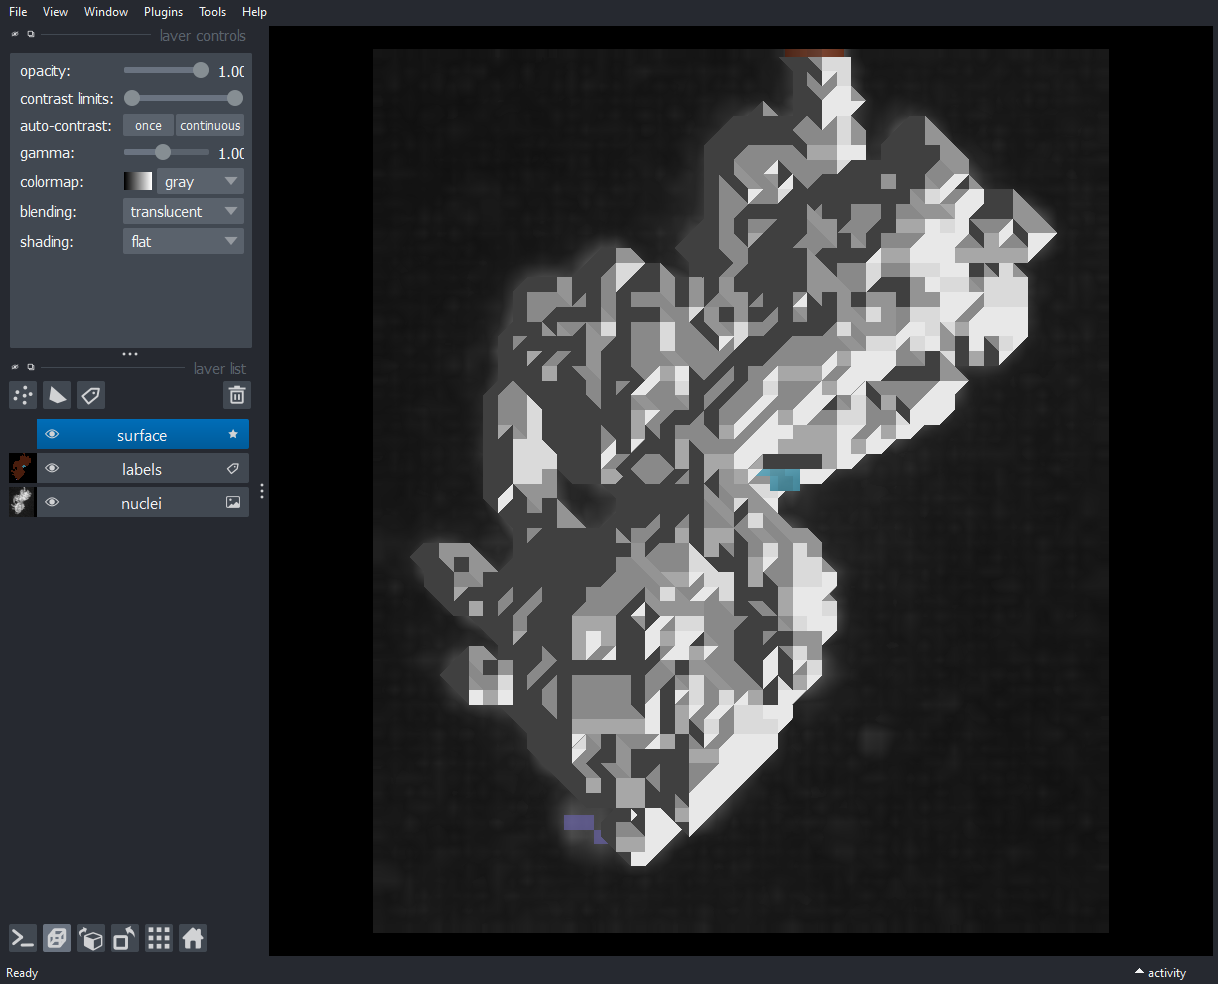

In [6]:
surface = nppas.largest_label_to_surface(labels)

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat')
surface = surface_layer.data

napari.utils.nbscreenshot(viewer)

## Surface filtering

Some filtering algorithms are sensitive to faults in the mesh. Such faults include duplicate faces/vertices, holes, etc. The `remove_duplicate_vertices()` function deals with this problem:

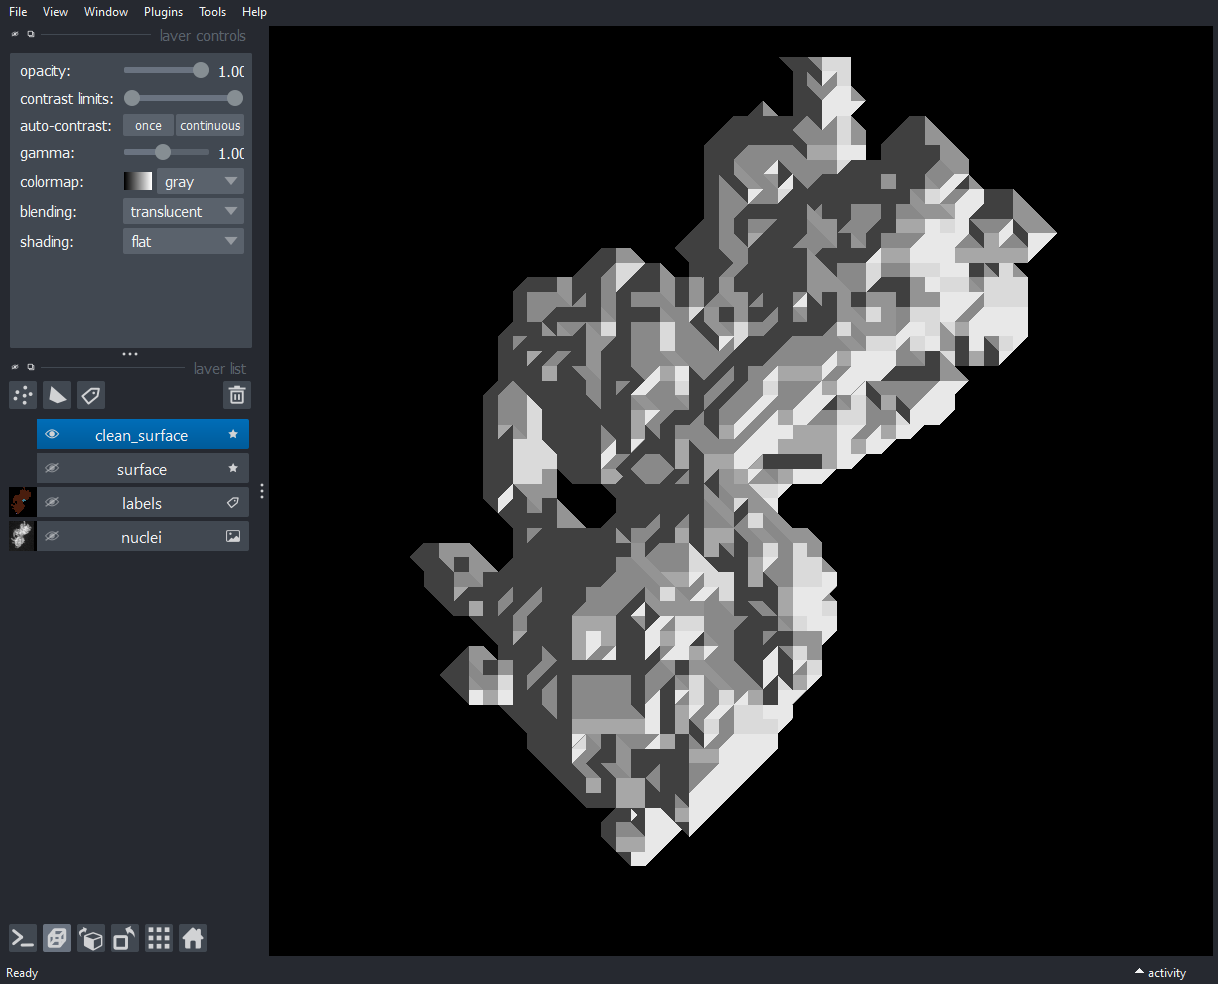

In [7]:
hide_all(viewer)

clean_surface = nppas.remove_duplicate_vertices(surface)
viewer.add_surface(clean_surface)

napari.utils.nbscreenshot(viewer)

After cleaning the surface, we can filter and smooth it.

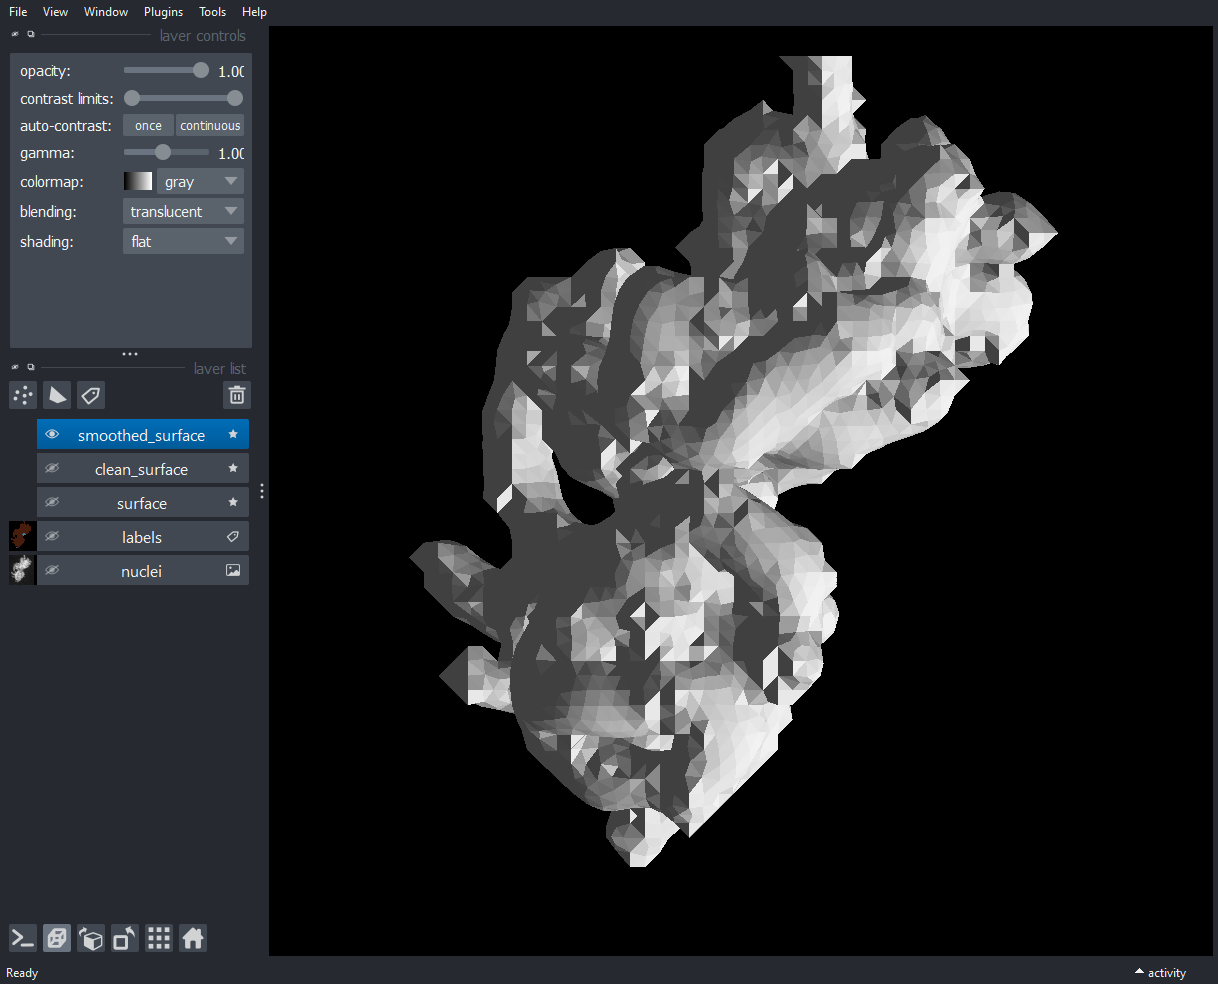

In [8]:
hide_all(viewer)

smoothed_surface = nppas.smooth_surface(clean_surface)
viewer.add_surface(smoothed_surface)

napari.utils.nbscreenshot(viewer)

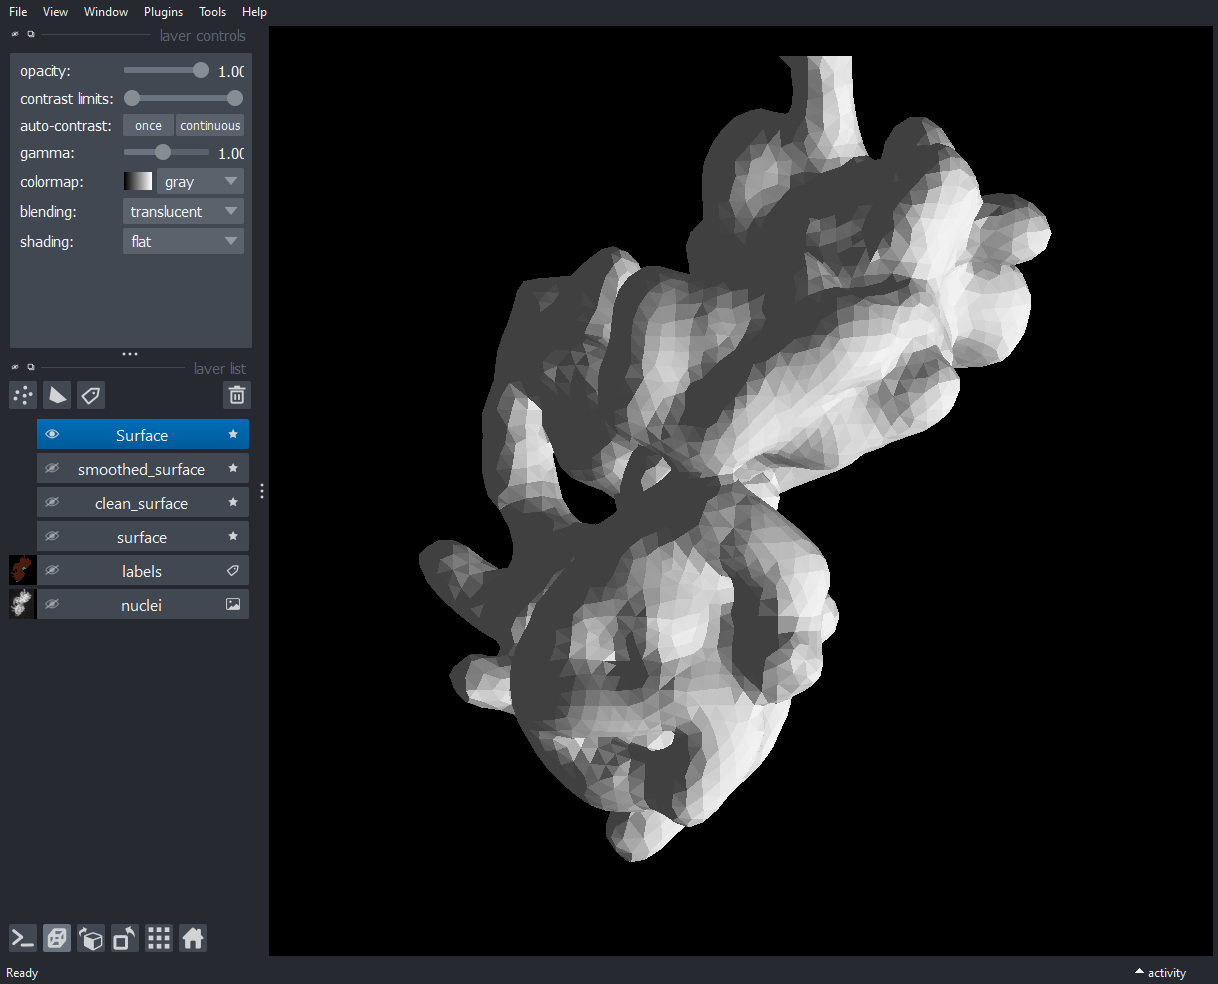

In [9]:
hide_all(viewer)

viewer.add_surface(nppas.smooth_surface(clean_surface, feature_angle=360))

napari.utils.nbscreenshot(viewer)

## Surface simplification

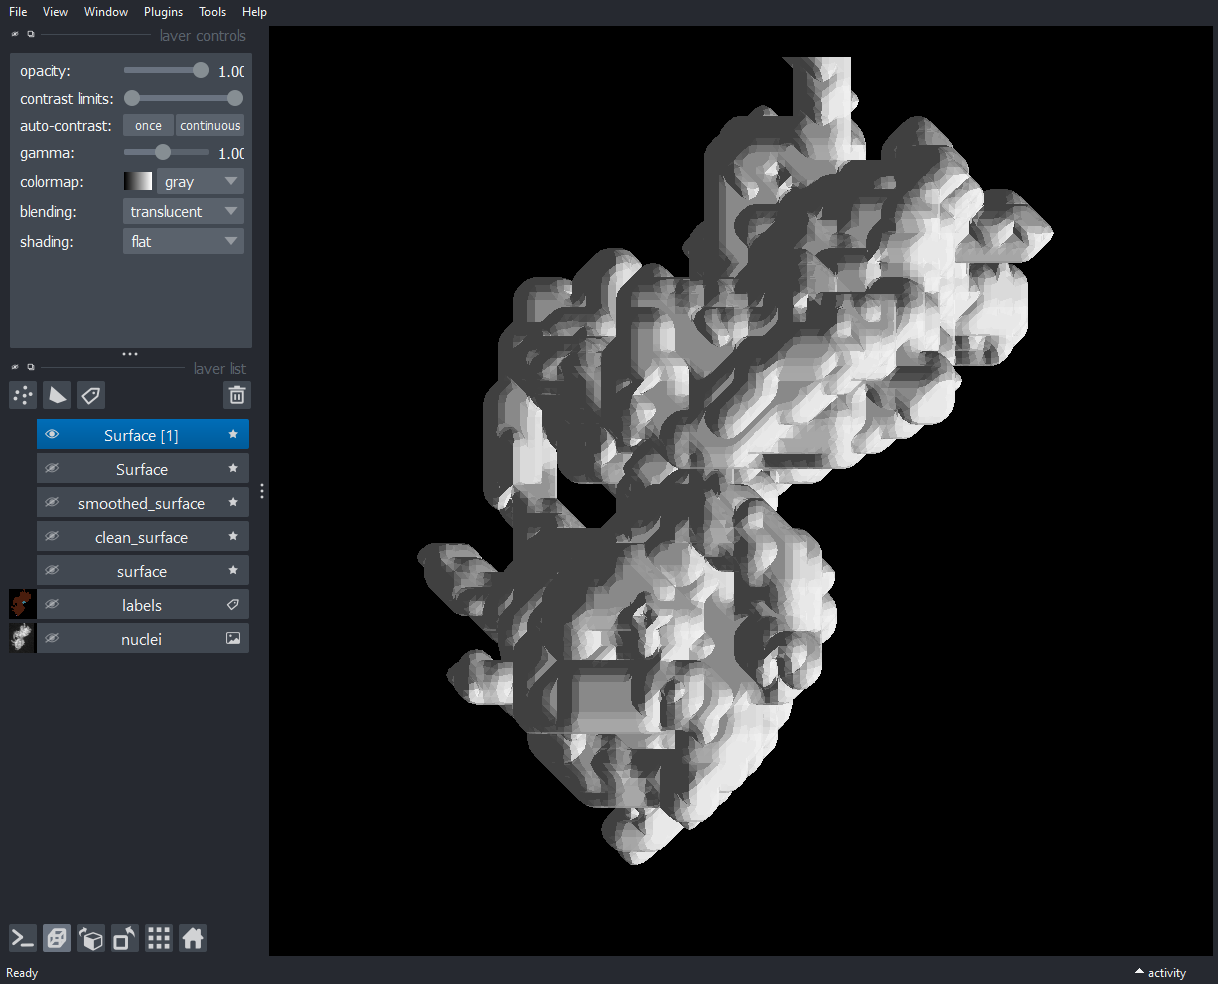

In [10]:
hide_all(viewer)

viewer.add_surface(nppas.subdivide_loop_vedo(surface))

napari.utils.nbscreenshot(viewer)

## Point clouds

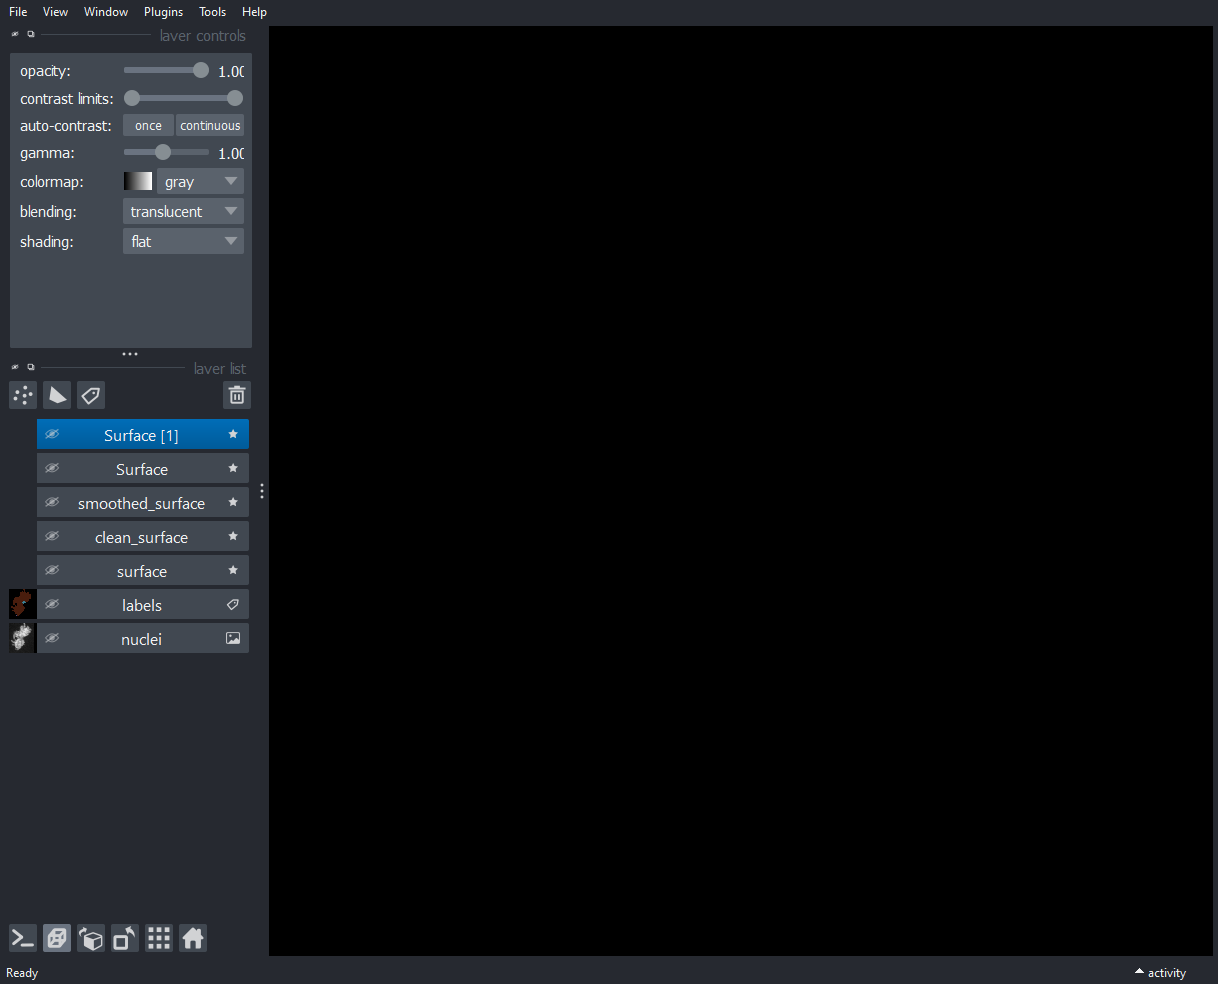

In [11]:
hide_all(viewer)

nppas.labels_to_centroids(labels, viewer=viewer)
centroids = viewer.layers[-1].data

napari.utils.nbscreenshot(viewer)

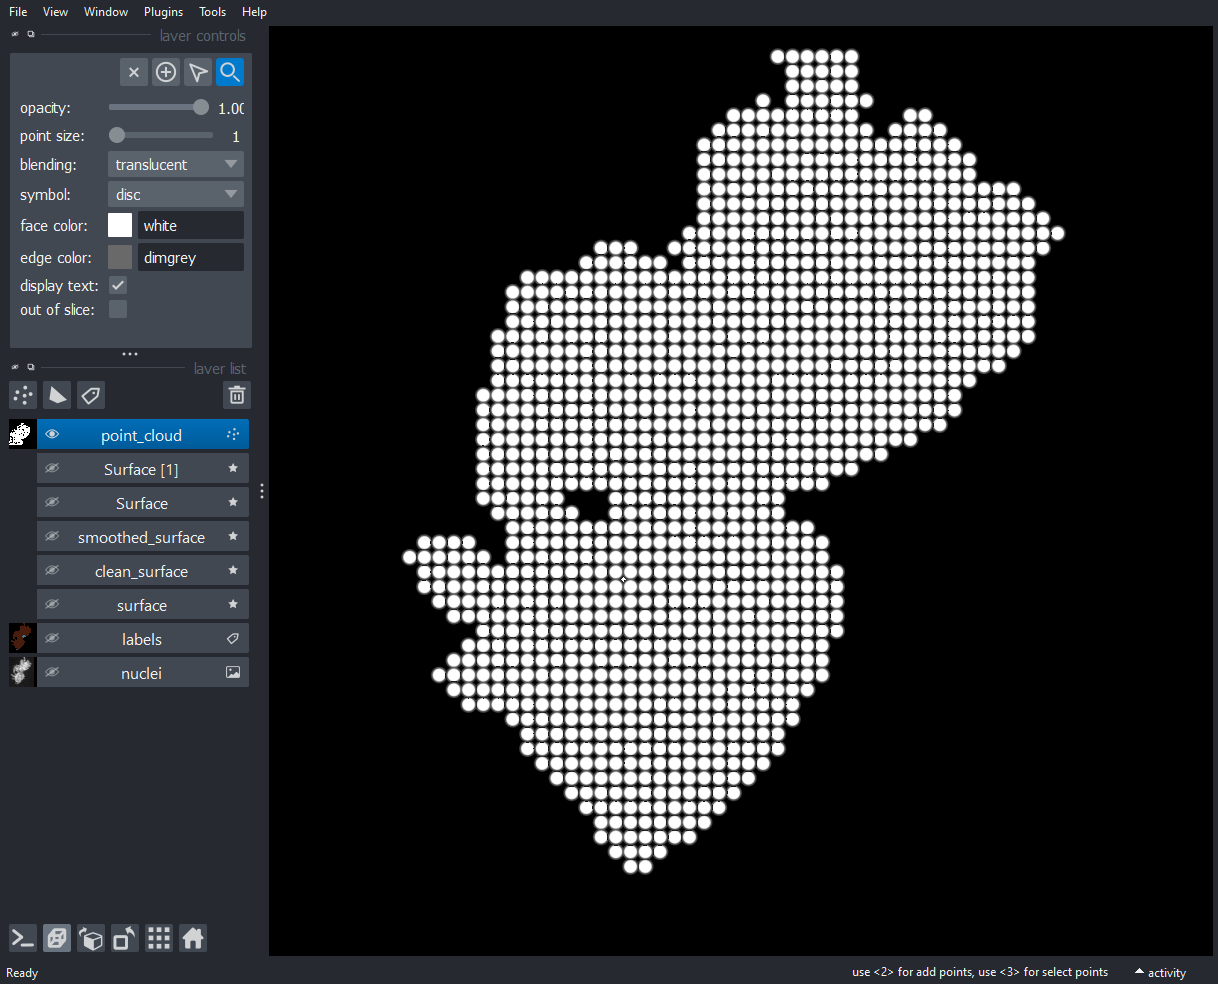

In [12]:
hide_all(viewer)
    
point_cloud = nppas.sample_points_from_surface(surface, distance_fraction=0.01)

points_layer = viewer.add_points(point_cloud, size=1)

napari.utils.nbscreenshot(viewer)

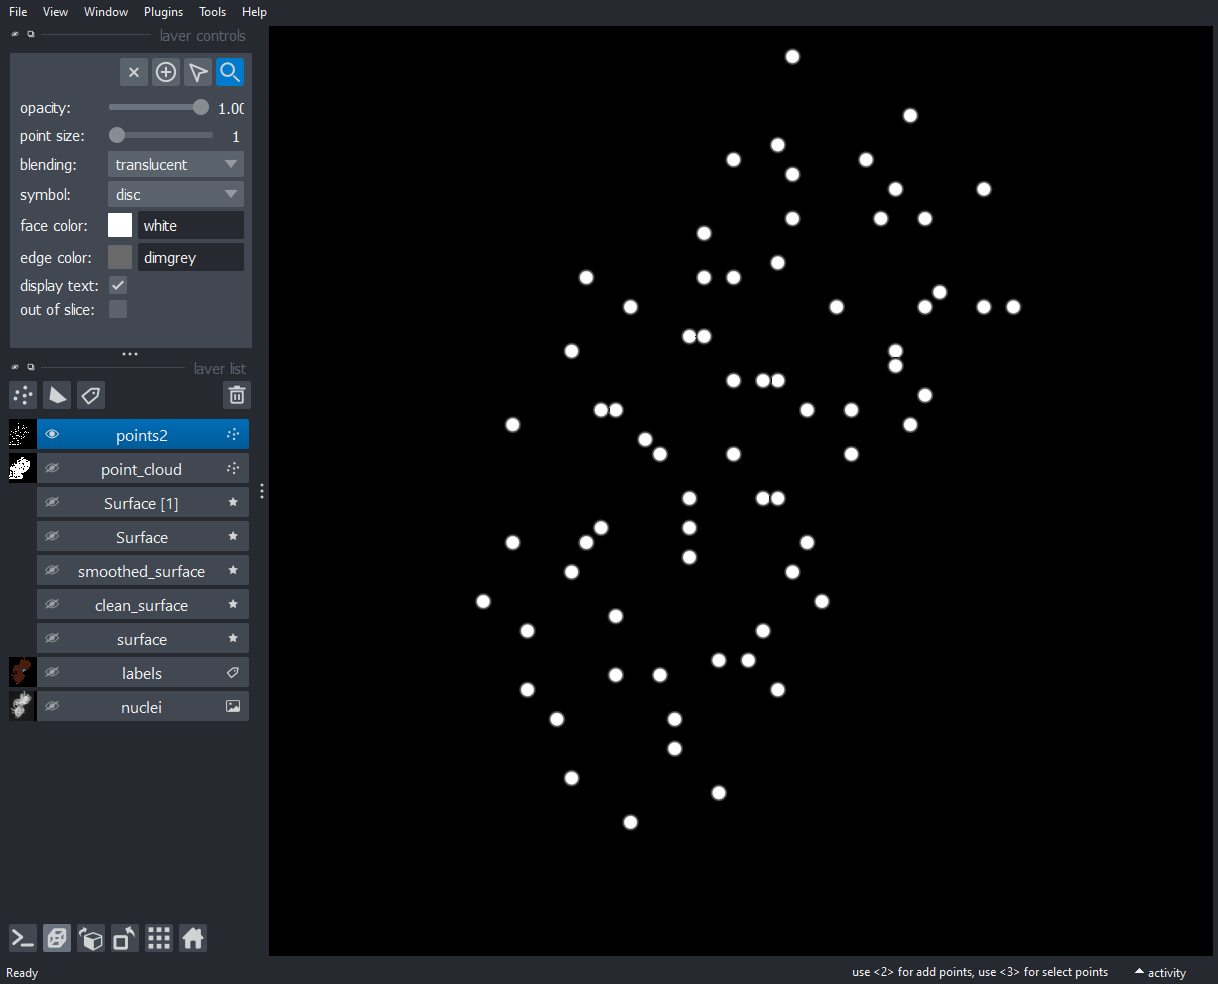

In [13]:
hide_all(viewer)
    
points2 = nppas.subsample_points(points_layer.data, distance_fraction=0.1)

viewer.add_points(points2, size=1)

napari.utils.nbscreenshot(viewer)

## From points to labels

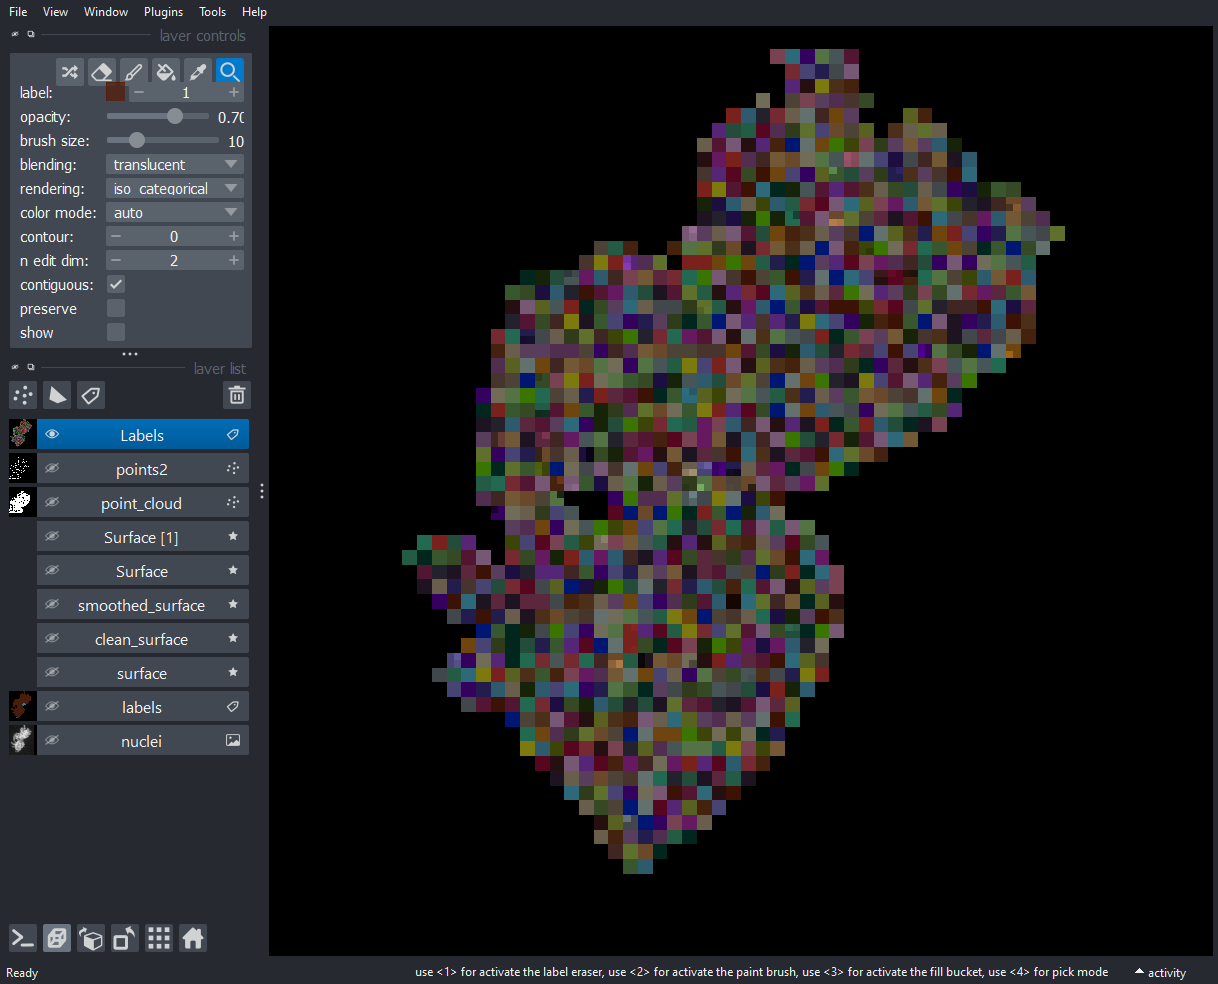

In [14]:
hide_all(viewer)

viewer.add_labels(nppas.points_to_labels(points_layer.data, labels))

napari.utils.nbscreenshot(viewer)

## From points to surfaces

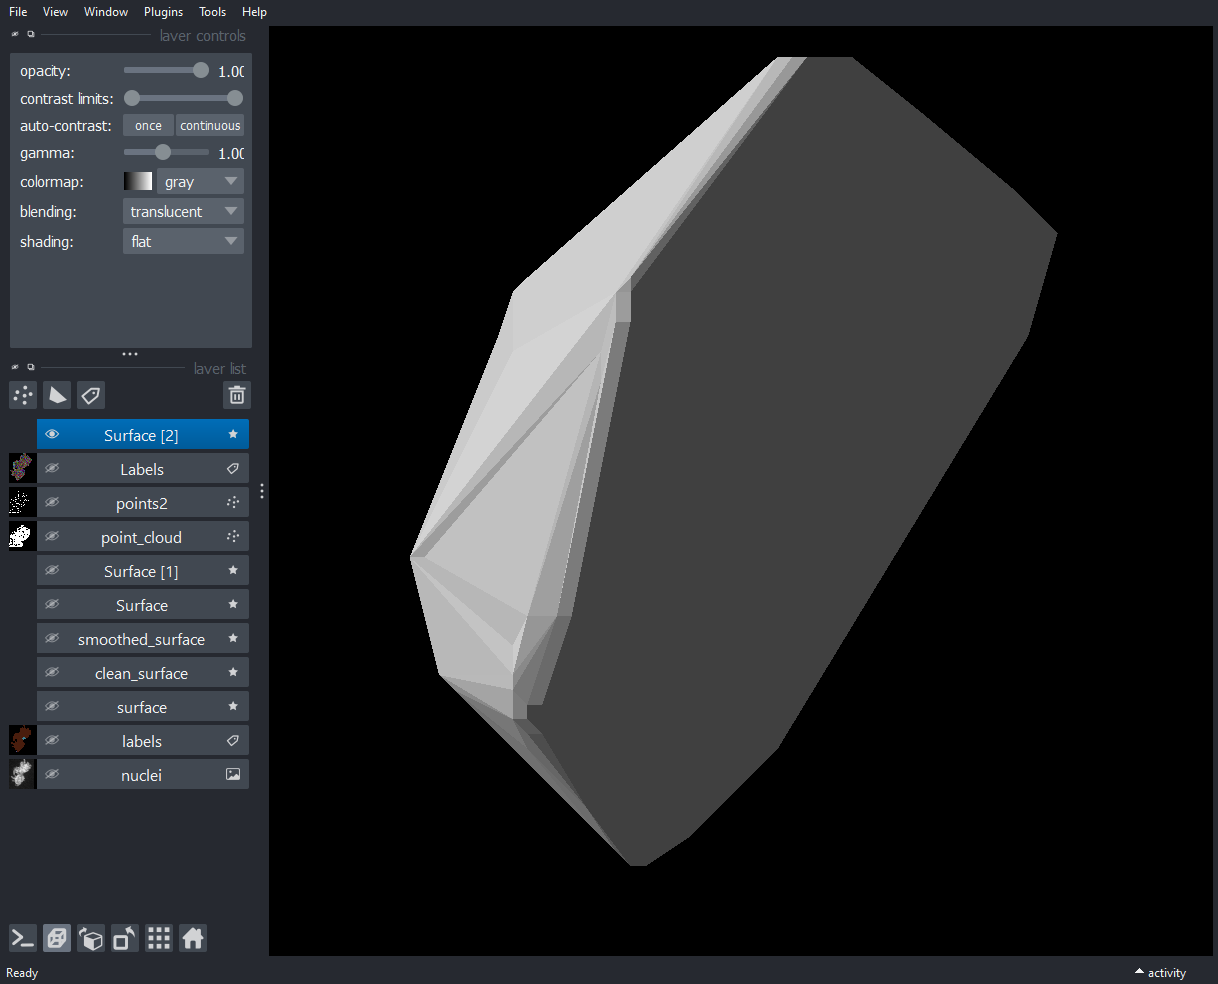

In [15]:
hide_all(viewer)

viewer.add_surface(nppas.create_convex_hull_from_points(points_layer.data))

napari.utils.nbscreenshot(viewer)

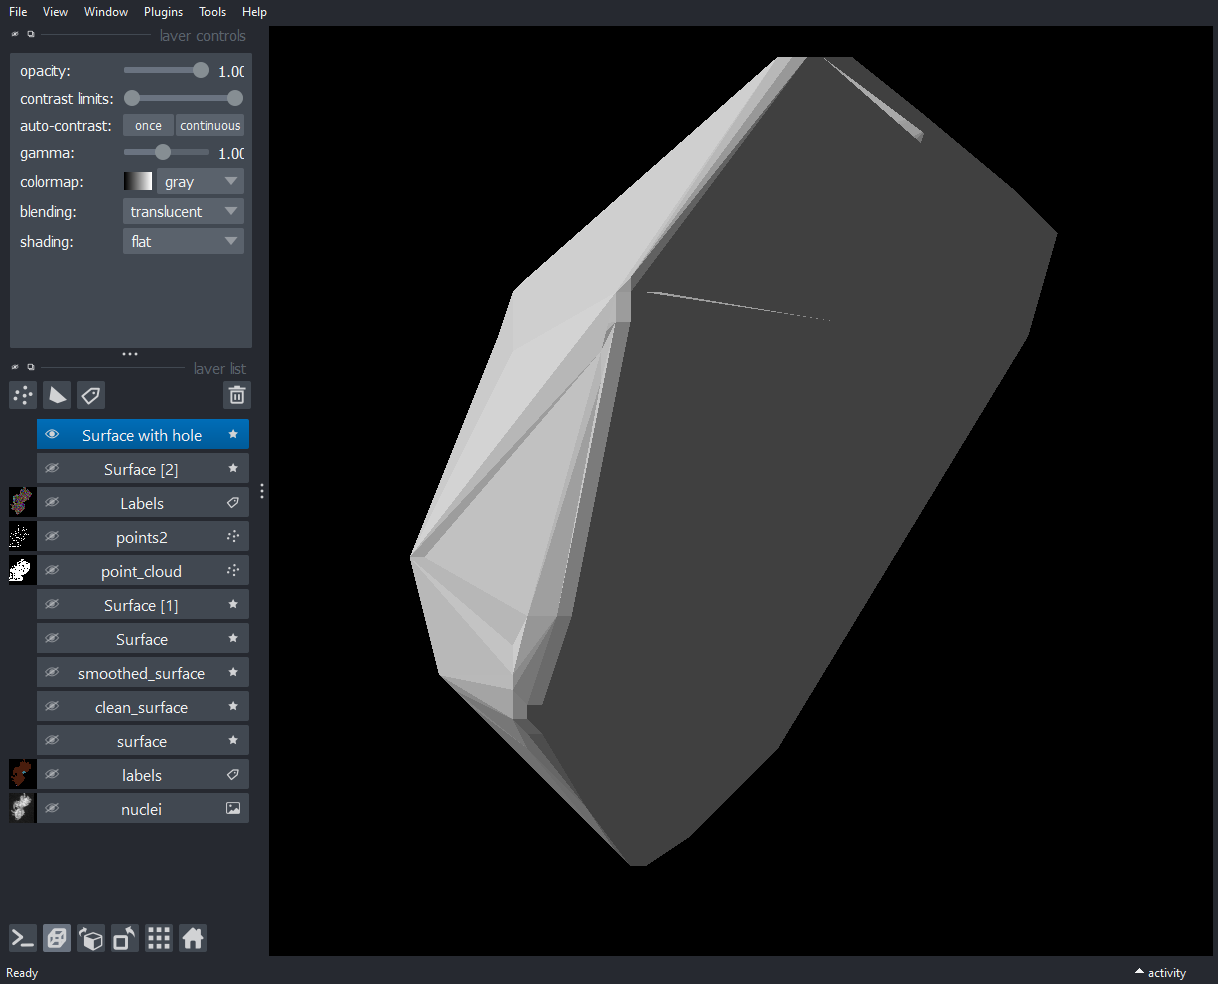

In [16]:
hide_all(viewer)

surface = nppas.create_convex_hull_from_points(points_layer.data)
faces_del = np.delete(surface[1], np.random.randint(0, surface[1].shape[0], 10), axis=0)
viewer.add_surface((surface[0], faces_del), name='Surface with hole')
napari.utils.nbscreenshot(viewer)

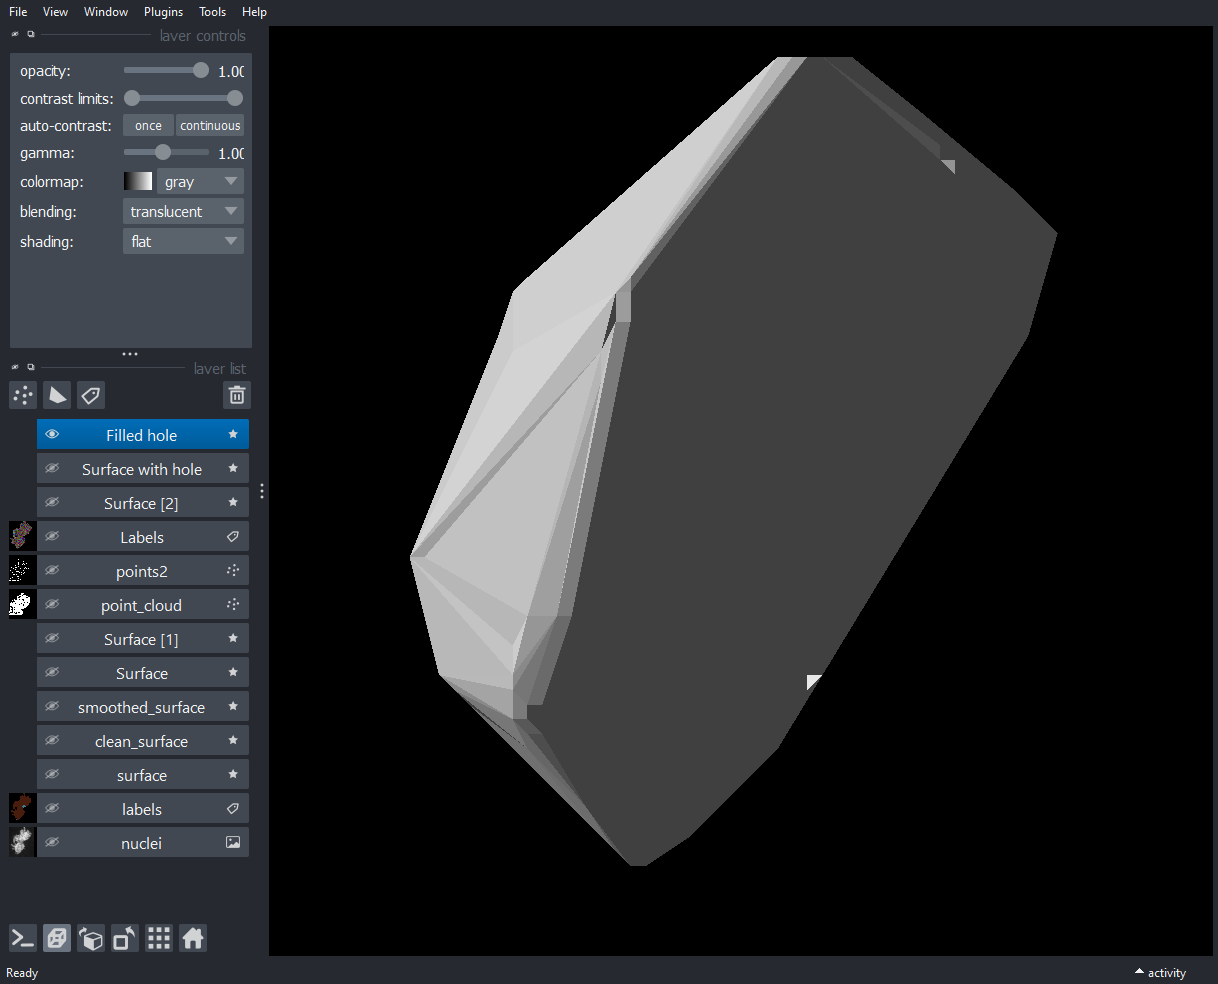

In [17]:
hide_all(viewer)
viewer.add_surface(nppas.fill_holes((surface[0], faces_del), size_limit=1000), name='Filled hole')
napari.utils.nbscreenshot(viewer)

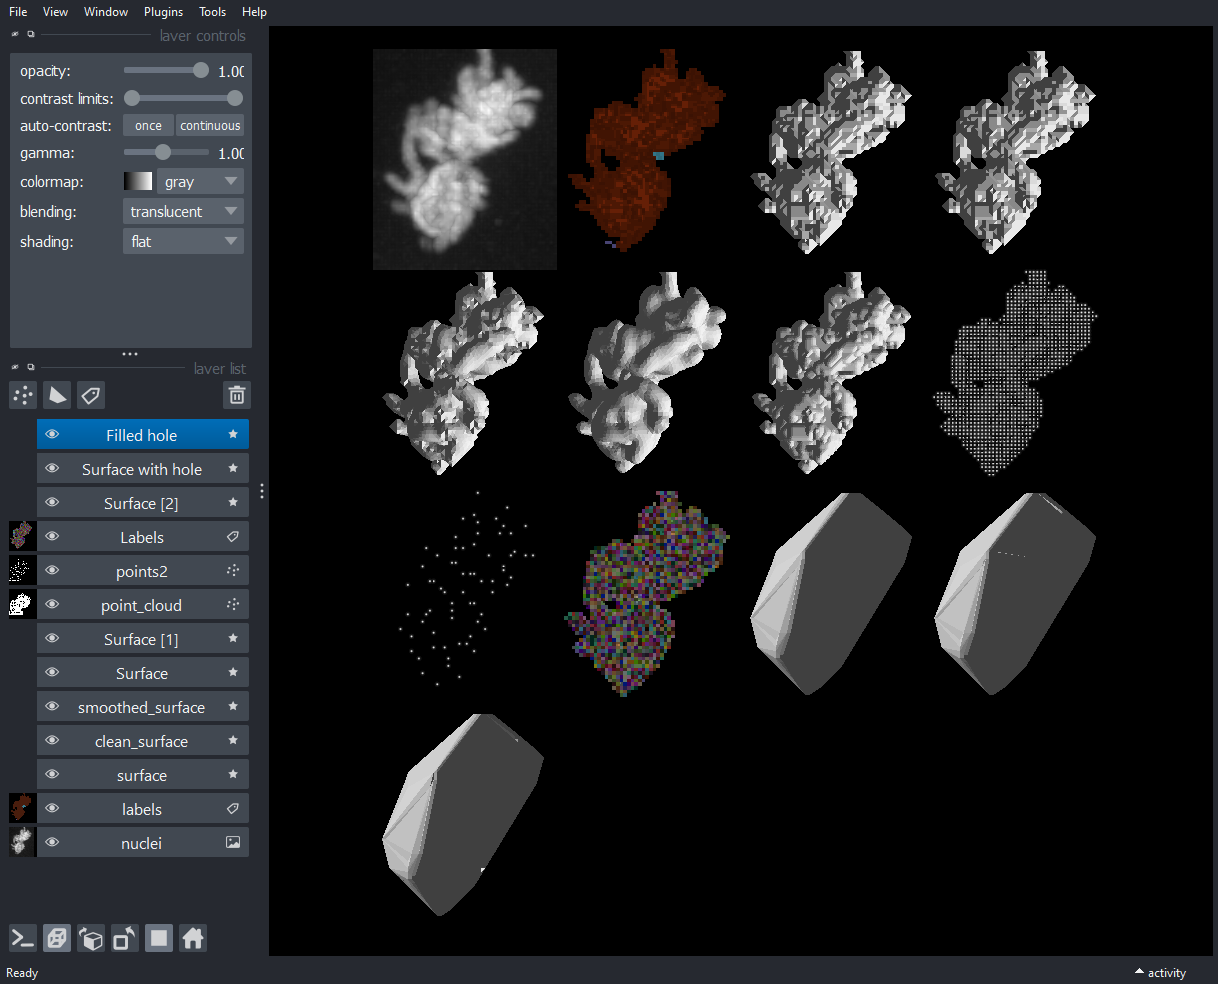

In [18]:
show_all(viewer)

viewer.grid.enabled = True
viewer.grid.stride = -1

napari.utils.nbscreenshot(viewer)